In [28]:
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt

In [29]:
from IPython.core.display import HTML
def play(filepath):    
    src = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="files/%s" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """%(filepath)
    display(HTML(src))

In [73]:
samplerate = 44100

def sine_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1,  phase=0.0):     
    t = np.linspace(0, duration, samplerate * duration)
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def triangular_wave(samplerate=samplerate, duration=1,frequency=440.0, amplitude=1, phase=0.0): 
    t = np.linspace(0, duration, samplerate * duration)
    return 2 * amplitude / np.pi * np.arcsin(np.sin(2 * np.pi * frequency * t + phase))

def sawtooth_wave(samplerate=samplerate, duration=1, frequency=440.0, amplitude=1, phase=0.0): 
    t = np.linspace(0, duration, samplerate * duration)
    return 2 * amplitude / np.pi * np.arctan(np.tan(2 * np.pi * frequency * t + phase))

def pulse_wave(samplerate=samplerate, duration=1, duty=0.5, frequency=440.0, amplitude=1, phase=0.0): 
    t = np.linspace(0, duration, samplerate * duration)
    values = ((t - phase) % (1/frequency)) < (duty / frequency)
    return amplitude * values.astype(float)

def noise(samplerate=samplerate, N = 1, amplitude = 1):
    return amplitude * np.random.random(samplerate * N)

from inspect import signature
def poly_wave(params, wave_func, samplerate=samplerate, duration=1):
    
    args_len = len(signature(wave_func).parameters) - 2
    poly = np.zeros(samplerate * duration)
    for i in range(len(params)):
        if len(params[i]) != args_len:
            raise ValueError(f"Value #{i + 1} has {len(params[i])} parameters, but wave_func needs {args_len}")
        poly = np.sum([poly, wave_func(samplerate, duration, *params[i])], axis=0) 
    return poly, len(params)

In [83]:
def to_wavefile(filename, gen_wave, k=1, sampwidth=4, framerate=samplerate, nchannels=1):
    samples = to_data(gen_wave, sampwidth,k)
    w = wave.open(filename, 'w')
    w.setparams((nchannels, sampwidth, framerate, int(np.ceil(len(samples) / framerate)), 'NONE', 'not compressed'))
    
    w.writeframes(samples)
    w.close()
    

In [84]:
def to_data(wave, sampwidth, k=1):
    type_dict = {1: 'b', 2:'h', 4:'l', 8:'q'}
    volume = 2 ** (8*sampwidth-1) - 1
    data = bytearray()
    for value in wave:
        data += bytearray(struct.pack(f"<{type_dict[sampwidth]}", int(value * volume / k)))
    return data

## Sine

In [85]:
sin = sine_wave()

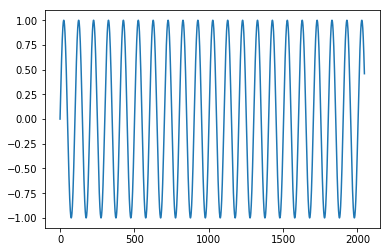

In [86]:
plt.plot(np.arange(0,2048), sin[:2048])

In [87]:
to_wavefile("data/sin.wav",sin)

In [88]:
play("data/sin.wav")

In [89]:
params = [
    [220,1, np.pi],
    [300,1, 2*np.pi],
    [440,1, np.pi]
]
poly_sin, k = poly_wave(params, sine_wave)

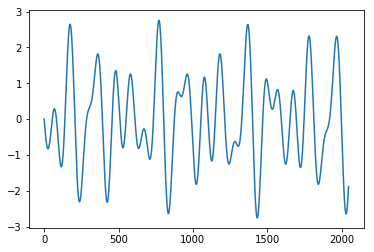

In [90]:
plt.plot(np.arange(0,2048), poly_sin[:2048])

In [91]:
to_wavefile("data/poly_sin.wav",poly_sin,k,4)

## Triangular

In [45]:
triangular = triangular_wave()

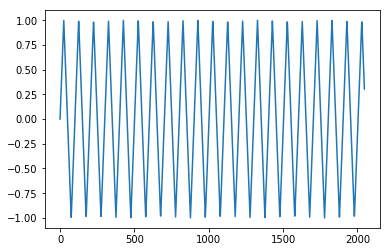

In [46]:
plt.plot(np.arange(0,2048), triangular[:2048])

In [47]:
to_wavefile("data/triangular.wav",triangular)

In [48]:
play("data/triangular.wav")

## Pulse

In [49]:
pulse = pulse_wave(duty=0.5)
pulse

array([1., 1., 1., ..., 0., 0., 1.])

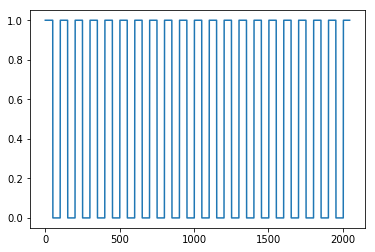

In [50]:
plt.plot(np.arange(0,2048), pulse[:2048])

In [51]:
to_wavefile("data/pulse.wav",pulse)

In [52]:
play("data/pulse.wav")

## Sawtooth

In [53]:
sawtooth = sawtooth_wave()

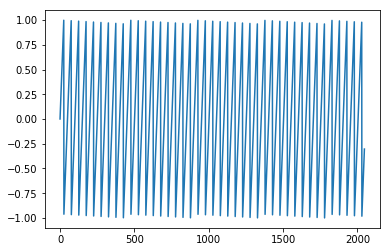

In [54]:
plt.plot(np.arange(0,2048), sawtooth[:2048])

In [55]:
to_wavefile("data/sawtooth.wav",sawtooth)

In [56]:
play("data/sawtooth.wav")

## Noise

In [57]:
noise_data = noise()

Exception ignored in: <function Wave_write.__del__ at 0x7ff20ade07b8>
Traceback (most recent call last):
  File "/home/misterion/anaconda3/envs/dsp/lib/python3.7/wave.py", line 327, in __del__
    self.close()
  File "/home/misterion/anaconda3/envs/dsp/lib/python3.7/wave.py", line 445, in close
    self._ensure_header_written(0)
  File "/home/misterion/anaconda3/envs/dsp/lib/python3.7/wave.py", line 465, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified


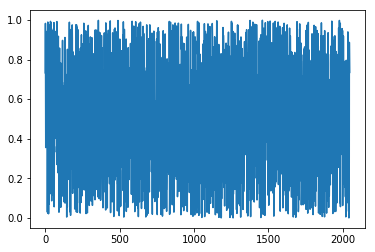

In [58]:
plt.plot(np.arange(0,2048), noise_data[:2048])

In [59]:
to_wavefile("data/noise.wav",noise_data)

In [40]:
play("data/noise.wav")